#**Introdução**
###**Desafio Regressão**

**Desafio elaborado por:**
Marcus Oliveira da Silva - QuintoAndar Senior Data Science Manager 

(https://www.youtube.com/watch?v=NC1P4AFTj54)

####**Contexto analítico**

Nesse desafio, você deve resolver um case de precificação de imóveis. Esse desafio foi construído em parceria entre a Tera e o QuintoAndar, onde o objetivo é simular um projeto de machine learning com características semelhantes ao que ocorre no dia a dia da empresa.

Imagine-se na seguinte situação: a área de marketing do QuintoAndar quer montar uma calculadora de preço (como esta [aqui: https://mkt.quintoandar.com.br/quanto-cobrar-de-aluguel/), e nesse projeto, os analistas negociais e corretores querem, também, entender as principais variáveis e características chaves que influenciam no valor de venda do imóvel (Ex: quantificar o impacto do aumento da área do imóvel no preço, ou quantificar o impacto de ter piscina, ou não no preço). Você é o cientista de dados que atuará na resolução desse case.

Para tanto, existem dois objetivos principais:

**Objetivo 1**, interpretabilidade: construir uma regressão linear simples, com poucas variáveis importantes, visando gerar insights para corretores e proprietários no quesito precificação dos imóveis. Ou seja, o foco será na interpretação dos coeficientes (ex: se aumentar a área do imóvel em uma unidade isso irá aumentar em Y o preço deste imóvel).

**Objetivo 2**, predição: construir um modelo com alto poder preditivo, com mais variáveis, visando um bom desempenho e com o intuito de ser usado em uma página web como a calculadora de preço. Note que, em uma situação real, um alto erro de inferência pode gerar grande insatisfação em um proprietário de imóvel, que pode ficar ofendido com o resultado. Por isso, em casos como esse, queremos ter o menor erro possível, mesmo que o modelo seja complexo e tenha uma interpretação mais difícil.

####**Base de dados**

O conjunto de dados descreve a venda de propriedades residenciais individuais de uma cidade americana, de 2006 a 2010. O conjunto de dados contém 1460 observações e um grande número de features (23 nominais, 23 ordinais, 14 discretas e 20 contínuas) envolvidas na avaliação do valor dos imóveis, ou seja, são 80 variáveis explicativas.

In [57]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Importando os dados

In [58]:
df = pd.read_csv("/content/base.csv")
df.drop('Id', axis=1, inplace=True)
df

,ClasseImovel,ClasseZona,Fachada,TamanhoLote,Rua,Beco,FormaProp,PlanoProp,Servicos,ConfigLote,...,AreaPiscina,QualidadePiscina,QualidadeCerca,Outros,ValorOutros,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,PrecoVenda
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [59]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ClasseImovel          1460 non-null   int64  
 1   ClasseZona            1460 non-null   object 
 2   Fachada               1201 non-null   float64
 3   TamanhoLote           1460 non-null   int64  
 4   Rua                   1460 non-null   object 
 5   Beco                  91 non-null     object 
 6   FormaProp             1460 non-null   object 
 7   PlanoProp             1460 non-null   object 
 8   Servicos              1460 non-null   object 
 9   ConfigLote            1460 non-null   object 
 10  InclinacaoLote        1460 non-null   object 
 11  Bairro                1460 non-null   object 
 12  Estrada1              1460 non-null   object 
 13  Estrada2              1460 non-null   object 
 14  TipoHabitacao         1460 non-null   object 
 15  EstiloHabitacao      

In [60]:
#Pegando as variaveis numericas 
num_vars = df.select_dtypes(include =['int','float']).columns.tolist()
num_vars.remove('ClasseImovel')
num_vars.remove('PrecoVenda')
print(f'Variaveis numericas {num_vars}')
print(' ')

#pegando as variaveis categoricas
cat_vars = df.select_dtypes(include =['object']).columns.tolist()
cat_vars.append('ClasseImovel')
print(f'Variaveis categoricas {cat_vars}')

Variaveis numericas ['Fachada', 'TamanhoLote', 'Qualidade', 'Condicao', 'AnoConstrucao', 'AnoReforma', 'AreaAlvenaria', 'AreaAcabPorao1', 'AreaAcabPorao2', 'AreaInacabPorao', 'AreaPorao', 'AreaTerreo', 'Area2Andar', 'BaixaQualiAreaAcab', 'AreaConstruida', 'BanheiroPorao', 'LavaboPorao', 'Banheiro', 'Lavabo', 'BedroomAbvGr', 'KitchenAbvGr', 'TotalQuartos', 'Lareira', 'AnoGaragem', 'CarrosGaragem', 'AreaGaragem', 'AreaDeck', 'AreaVarandaAberta', 'AreaVarandaFechada', 'AreaVaranda3Estacoes', 'AreaAlpendre', 'AreaPiscina', 'ValorOutros', 'MesVenda', 'AnoVenda']
 
Variaveis categoricas ['ClasseZona', 'Rua', 'Beco', 'FormaProp', 'PlanoProp', 'Servicos', 'ConfigLote', 'InclinacaoLote', 'Bairro', 'Estrada1', 'Estrada2', 'TipoHabitacao', 'EstiloHabitacao', 'TipoTelhado', 'MaterialTelhado', 'Exterior1', 'Exterior2', 'TipoAlvenaria', 'QualidadeCobertura', 'CondicaoExterna', 'TipoFundacao', 'AlturaPorao', 'CondicaoPorao', 'ParedePorao', 'TipoAcabPorao1', 'TipoAcabPorao2', 'Aquecimento', 'Qualidade

#Analise exploratoria

### Analise Univariada 

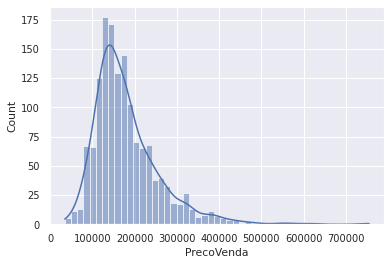

In [61]:
#visualizando a distribuição da nossa variavel target Preco de venda 
sns.histplot(df['PrecoVenda'],kde = True)

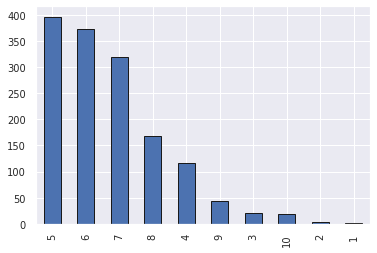

In [62]:
#visualizando a distribuição de qualidade de materiais usado na construção da casa. 
#sendo 1 muito ruim e 10 muito excelente.
df["Qualidade"].value_counts().plot(kind = 'bar',edgecolor = 'k')

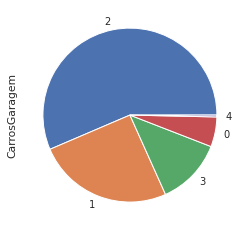

In [63]:
#Visualizando tamanho da garagem em capacidade de carros
df["CarrosGaragem"].value_counts().plot(kind = 'pie')

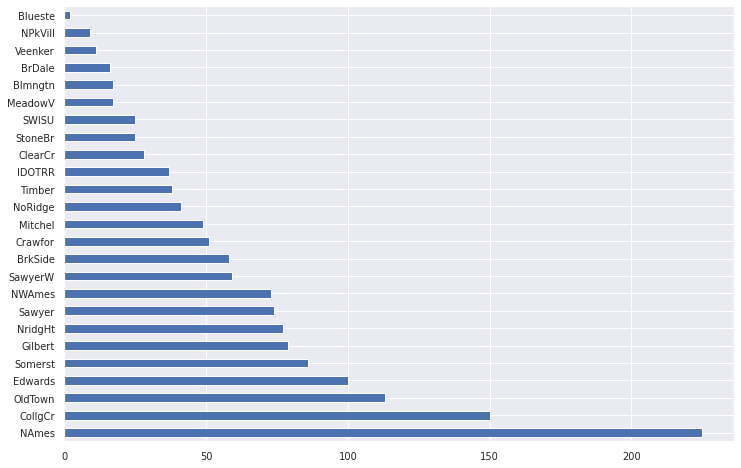

In [64]:
#visualizando a distribuição por bairros 
df["Bairro"].value_counts().plot(kind = 'barh',figsize = (12,8))

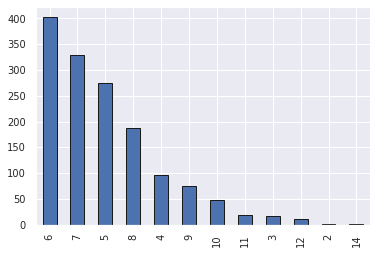

In [65]:
df["TotalQuartos"].value_counts().plot(kind = 'bar',edgecolor = 'k')

### Analise Bivariada 

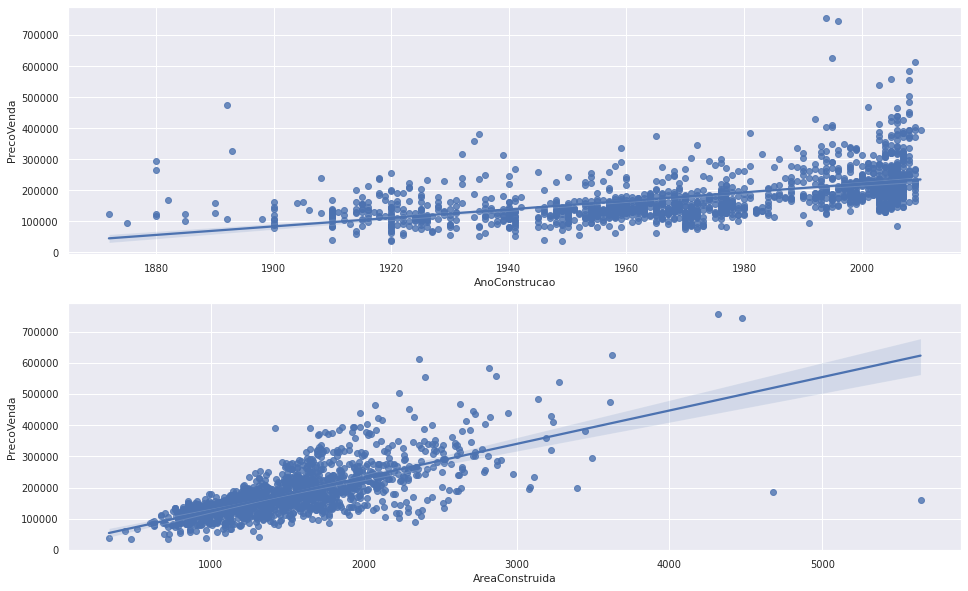

In [66]:
fig, axs = plt.subplots(figsize = (16,10),ncols = 1, nrows = 2)

#visualizando a relação de ano de construção com preço de venda 
sns.regplot(x='AnoConstrucao', y = 'PrecoVenda', data = df,ax=axs[0])
#visualizando a relação de area construida com preço de venda
sns.regplot(x='AreaConstruida', y = 'PrecoVenda', data = df,ax=axs[1])


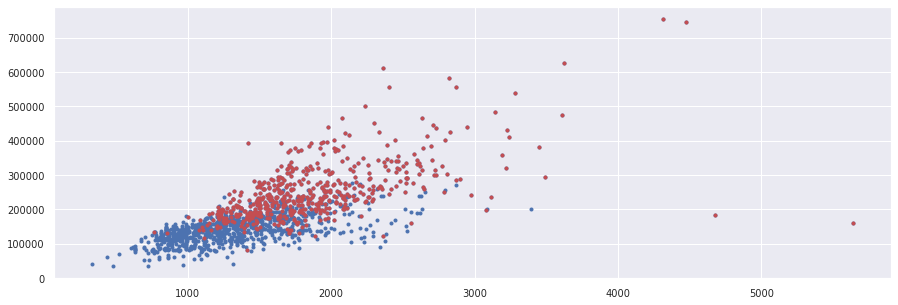

In [67]:
#visualizando se a qualidade dos materias serem 7 ou maior influencia no preço 
plt.figure(figsize= (15,5))
plt.plot(df.AreaConstruida,df.PrecoVenda,'.')
plt.plot(df.loc[df.Qualidade >= 7].AreaConstruida,df.loc[df.Qualidade >= 7].PrecoVenda,'r.')

Aparentemente existe uma relação entre a qualidade de materias da casa e o preço de venda 

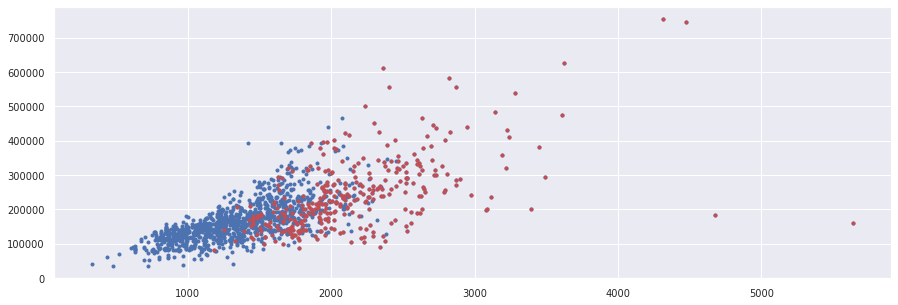

In [68]:
#verificando se existe relação entre o numero de quartos e o preço 
plt.figure(figsize= (15,5))
plt.plot(df.AreaConstruida,df.PrecoVenda,'.')
plt.plot(df.loc[df.TotalQuartos >= 8].AreaConstruida,df.loc[df.TotalQuartos >= 8].PrecoVenda,'r.')

o numero de quartos não parece ter muita influencia sobre o preço 

In [69]:
#criando uma matriz com os nomes das variaveis categoricas para visualizalas de uma unica vez 
cat_vars = [['ClasseZona','Rua'],
 ['Beco','FormaProp'],
 ['PlanoProp','Servicos'],
 ['ConfigLote','InclinacaoLote'],
 ['Bairro','Estrada1'],
 ['Estrada2','TipoHabitacao'],
 ['EstiloHabitacao','TipoTelhado'],
 ['MaterialTelhado','Exterior1'],
 ['Exterior2','TipoAlvenaria'],
 ['QualidadeCobertura','CondicaoExterna'],
 ['TipoFundacao','AlturaPorao'],
 ['CondicaoPorao','ParedePorao'],
 ['TipoAcabPorao1','TipoAcabPorao2'],
 ['Aquecimento','QualidadeAquecimento'],
 ['ArCentral','InstalacaoEletrica'],
 ['QualidadeCozinha','Funcionalidade'],
 ['QualdiadeLareira','LocalGaragem'],
 ['AcabamentoGaragem','QualidadeGaragem'],
 ['CondicaoGaragem','EntradaPavimentada'],
 ['QualidadePiscina','QualidadeCerca'],
 ['Outros','TipoVenda'],
 ['CondicaoVenda','ClasseImovel']]

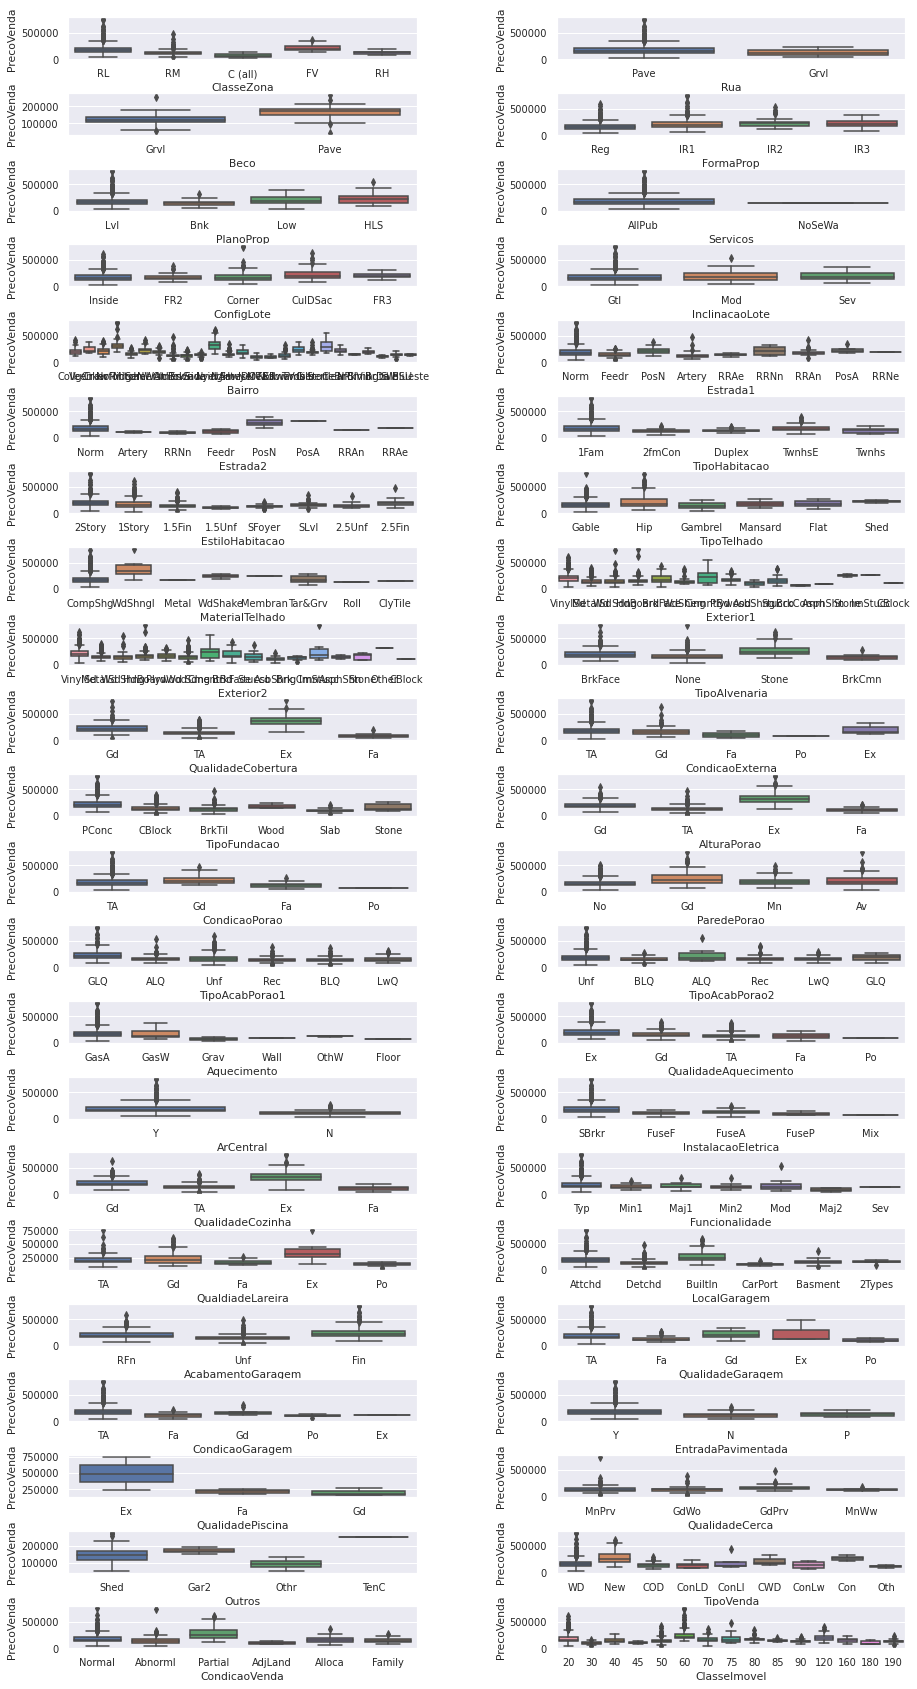

In [70]:
sns.set(font_scale=0.9)
fig, eixo = plt.subplots(22,2,figsize=(15,30)) # Criando uma figura de 22 linhas x 2 colunas para nossa matriz
fig.subplots_adjust(hspace=0.8, wspace=0.4)
# Para cada linha 
for linha in range(22):
    # Para cada coluna   
    for coluna in range(2): 
      sns.boxplot(data=df,x=cat_vars[linha][coluna],y='PrecoVenda',ax=eixo[linha][coluna])

### visualizando as correlações com **heatmap** do seaborn

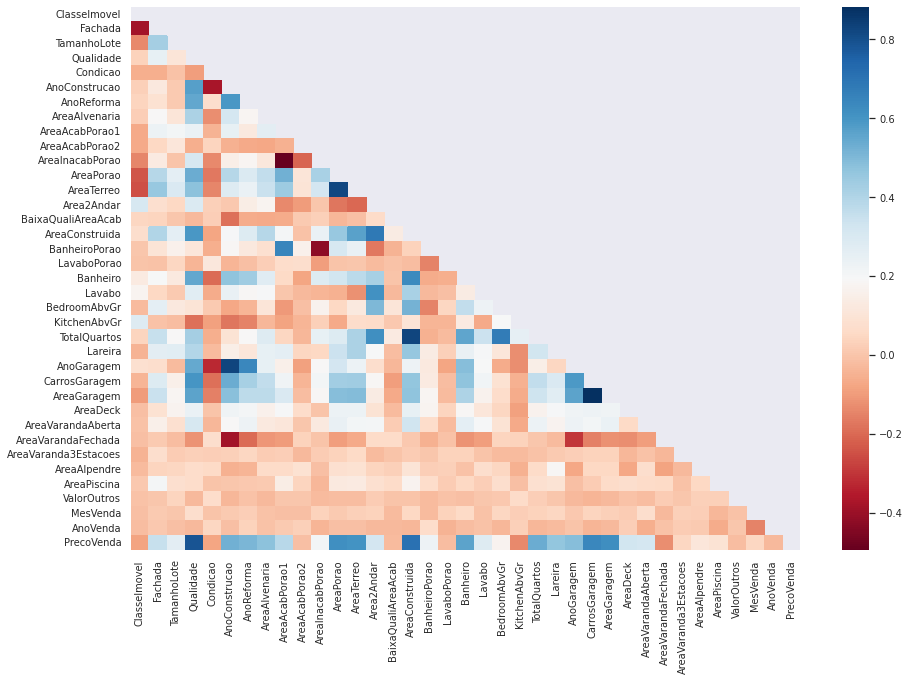

In [74]:
import numpy as np
# Plotando a matriz de correlações usando um Heatmap para dar cor aos números
plt.figure(figsize=(15,10))
sns.heatmap(
    df.corr(), #Fonte dos dados, nossa matriz de correlação
    cmap='RdBu', # Mapa de cores do vermelho (menor) para o azul (maior)
    mask=np.triu( # Faz uma matriz triangular
        np.ones_like(df.corr()) # usando como base uma matriz de '1's, do mesmo tamanho que a matriz de correlação
    ) # A máscara vai então 'apagar' a diagonal superior da matriz
           )
plt.show()

In [77]:
corr_matrix = df.corr()
corr_matrix['PrecoVenda'].sort_values(ascending = False)

PrecoVenda              1.000000
Qualidade               0.790982
AreaConstruida          0.708624
CarrosGaragem           0.640409
AreaGaragem             0.623431
AreaPorao               0.613581
AreaTerreo              0.605852
Banheiro                0.560664
TotalQuartos            0.533723
AnoConstrucao           0.522897
AnoReforma              0.507101
AnoGaragem              0.486362
AreaAlvenaria           0.477493
Lareira                 0.466929
AreaAcabPorao1          0.386420
Fachada                 0.351799
AreaDeck                0.324413
Area2Andar              0.319334
AreaVarandaAberta       0.315856
Lavabo                  0.284108
TamanhoLote             0.263843
BanheiroPorao           0.227122
AreaInacabPorao         0.214479
BedroomAbvGr            0.168213
AreaAlpendre            0.111447
AreaPiscina             0.092404
MesVenda                0.046432
AreaVaranda3Estacoes    0.044584
AreaAcabPorao2         -0.011378
LavaboPorao            -0.016844
ValorOutro

In [79]:
corr_matrix['AreaConstruida'].sort_values(ascending=False)

AreaConstruida          1.000000
TotalQuartos            0.825489
PrecoVenda              0.708624
Area2Andar              0.687501
Banheiro                0.630012
Qualidade               0.593007
AreaTerreo              0.566024
BedroomAbvGr            0.521270
AreaGaragem             0.468997
CarrosGaragem           0.467247
Lareira                 0.461679
AreaPorao               0.454868
Lavabo                  0.415772
Fachada                 0.402797
AreaAlvenaria           0.390857
AreaVarandaAberta       0.330224
AnoReforma              0.287389
TamanhoLote             0.263116
AreaDeck                0.247433
AreaInacabPorao         0.240257
AnoGaragem              0.231197
AreaAcabPorao1          0.208171
AnoConstrucao           0.199010
AreaPiscina             0.170205
BaixaQualiAreaAcab      0.134683
AreaAlpendre            0.101510
KitchenAbvGr            0.100063
ClasseImovel            0.074853
MesVenda                0.050240
BanheiroPorao           0.034836
AreaVarand

# Pré-Preprocessamento, limpeza dos dados, construção de features

In [103]:
#pd.set_option('display.max_rows', 10)
df.isnull().mean().sort_values(ascending=False)

QualidadePiscina        0.995205
Outros                  0.963014
Beco                    0.937671
QualidadeCerca          0.807534
QualdiadeLareira        0.472603
                          ...   
Aquecimento             0.000000
QualidadeAquecimento    0.000000
ClasseZona              0.000000
AreaTerreo              0.000000
PrecoVenda              0.000000
Length: 80, dtype: float64

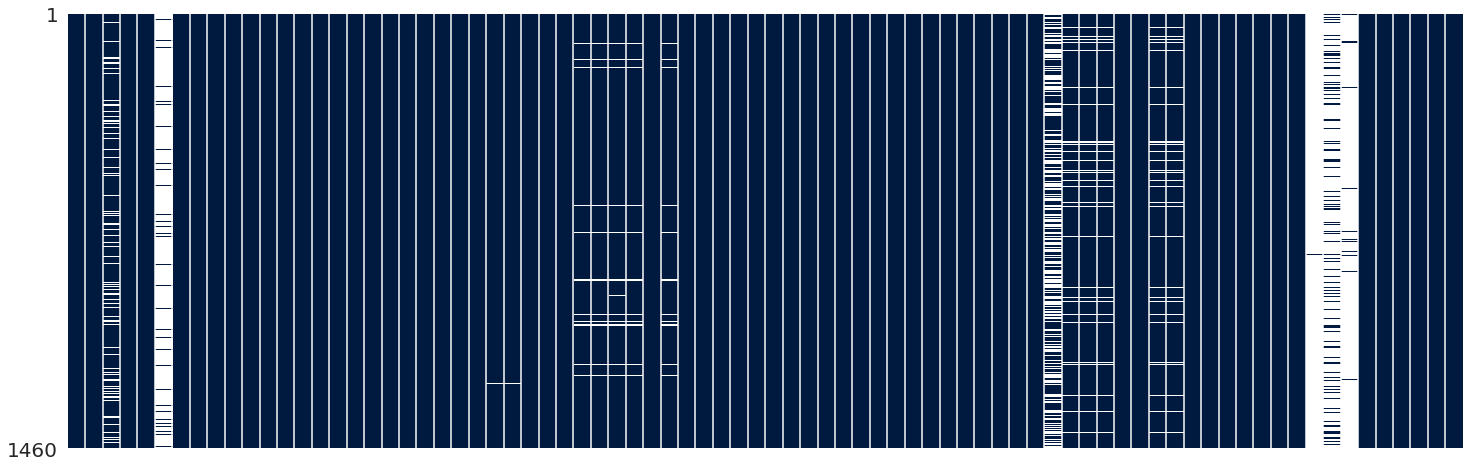

In [91]:
import missingno as msno
msno.matrix(df, figsize = (25, 8), color = (0, 0.1, 0.25), sparkline = False);

In [101]:
nans = df.isna().sum()
nans = nans[nans > 0]/len(df)
nans[nans > 0.10]

Fachada             0.177397
Beco                0.937671
QualdiadeLareira    0.472603
QualidadePiscina    0.995205
QualidadeCerca      0.807534
Outros              0.963014
dtype: float64

In [104]:
remove = ['Fachada','Beco','QualdiadeLareira','QualidadePiscina','QualidadeCerca','Outros']
df.drop(remove,axis =1, inplace = True)

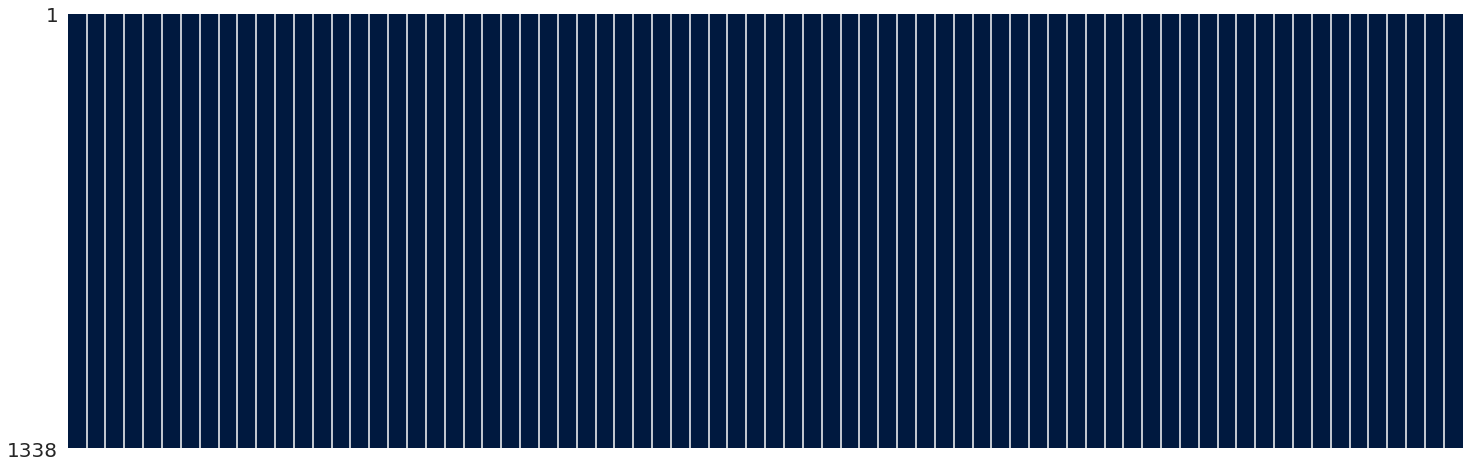

In [106]:
df = df.dropna()
msno.matrix(df, figsize = (25, 8), color = (0, 0.1, 0.25), sparkline = False);